<a href="https://colab.research.google.com/github/Vivek56713/aiml_2303A52460/blob/main/lab%20exam%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import necessary libraries

In [1]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA



#load a classification data set

In [2]:

data = load_iris()
X = data.data
y = data.target



#split the dataset into training and testing set

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#intialise knn clasification with k=3

In [4]:
knn = KNeighborsClassifier(n_neighbors=3)


# Train the model


In [5]:
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

# Predict on the test set


In [6]:
y_pred = knn.predict(X_test)


# Evaluate accuracy

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with K=3: {accuracy * 100:.2f}%")


Accuracy with K=3: 100.00%


# 2. Visualize the decision boundary for KNN with k=3

# Reduce the dataset to two dimensions using PCA


In [8]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)


# Split into training and testing sets again for visualization


In [9]:
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)


# Train the KNN model with k=3


In [10]:
knn.fit(X_train_reduced, y_train)


KNeighborsClassifier(n_neighbors=3)

# Create a mesh grid for plotting decision boundaries


In [11]:
h = .02
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class for each point in the grid


In [12]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Plot the decision boundary


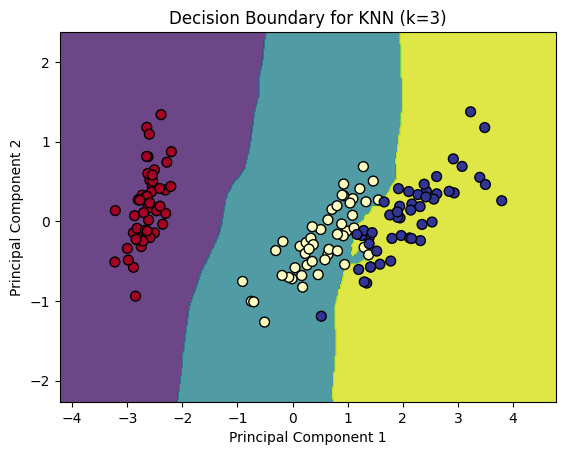

In [13]:
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.RdYlBu)
plt.title("Decision Boundary for KNN (k=3)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# 3. Split the dataset into training and testing sets and compute the confusion matrix

# Compute confusion matrix


In [14]:
cm = confusion_matrix(y_test, y_pred)


# Plot confusion matrix


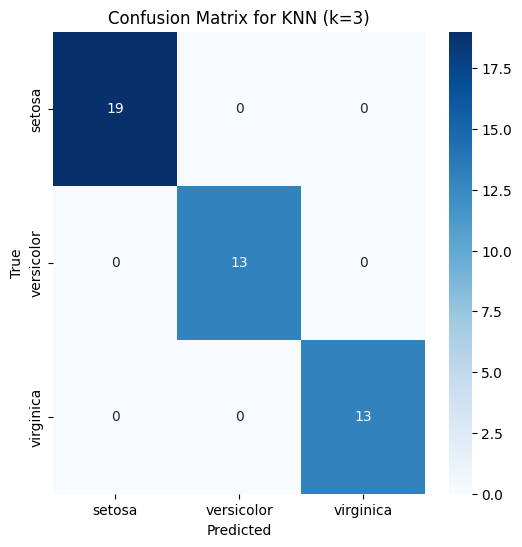

In [15]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix for KNN (k=3)")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# 4. Compare the performance of KNN with and without feature scaling

# Without scaling


In [16]:
knn.fit(X_train, y_train)
y_pred_no_scale = knn.predict(X_test)
accuracy_no_scale = accuracy_score(y_test, y_pred_no_scale)


# With scaling


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)



# Compare results


In [19]:
print(f"Accuracy without scaling: {accuracy_no_scale * 100:.2f}%")
print(f"Accuracy with scaling: {accuracy_scaled * 100:.2f}%")


Accuracy without scaling: 100.00%
Accuracy with scaling: 100.00%


# 5. Tune the value of k (e.g., test with k=5) and compare performance

# Try different values of k


In [20]:
for k in [3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    accuracy_k = accuracy_score(y_test, y_pred_k)
    print(f"Accuracy with k={k}: {accuracy_k * 100:.2f}%")

Accuracy with k=3: 100.00%
Accuracy with k=5: 100.00%
